In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,plot_roc_curve,accuracy_score,recall_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
data.shape

(284807, 31)

In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')

In [8]:
data.duplicated().sum()

1081

In [9]:
data = data.drop_duplicates()

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [12]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [13]:
data.nunique()

Time      124592
V1        275653
V2        275655
V3        275657
V4        275654
V5        275657
V6        275652
V7        275651
V8        275643
V9        275656
V10       275646
V11       275648
V12       275654
V13       275657
V14       275653
V15       275653
V16       275645
V17       275646
V18       275655
V19       275645
V20       275632
V21       275617
V22       275644
V23       275611
V24       275645
V25       275640
V26       275647
V27       275597
V28       275558
Amount     32767
class          2
dtype: int64

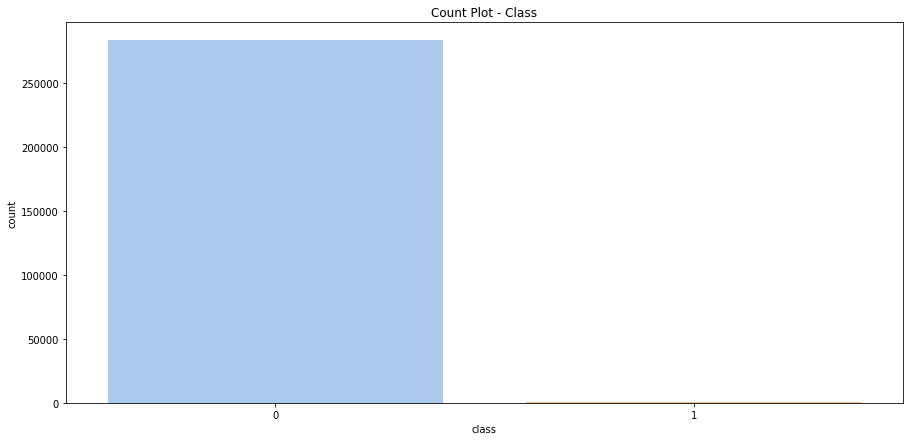

In [16]:
plt.figure(figsize=[15,7],)
plt.title('Count Plot - Class')
# color = ['red', 'blue']
sns.countplot(x = 'class', data = data, palette = 'pastel')
plt.show()

In [18]:
lis=["Not Fraud","Frauds"]
fraud_or_not = data["class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
fig = px.pie(values=data['class'].value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="percentage between Frauds & genuine transactions")
fig.show()

<AxesSubplot:>

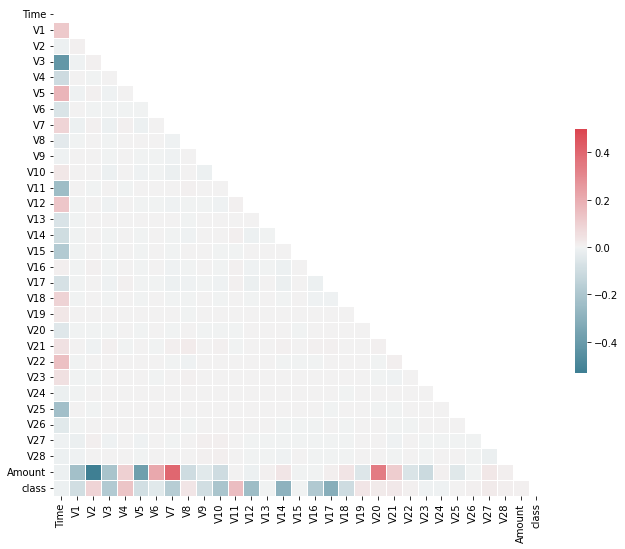

In [19]:
corr=data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5})

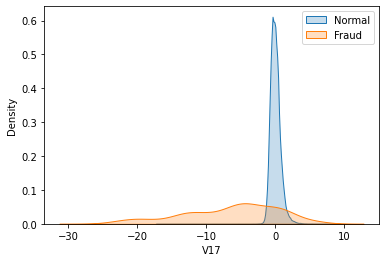

In [21]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data[data['class'] == 0]['V17'], label="Normal", shade=True)
sns.kdeplot(data=data[data['class'] == 1]['V17'], label="Fraud", shade=True)
plt.legend()
plt.show()

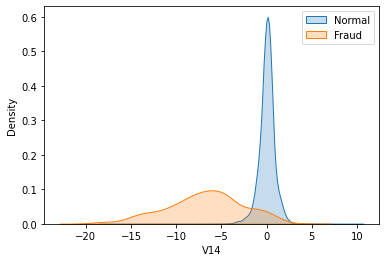

In [22]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data[data['class'] == 0]['V14'], label="Normal", shade=True)
sns.kdeplot(data=data[data['class'] == 1]['V14'], label="Fraud", shade=True)
plt.legend()
plt.show()

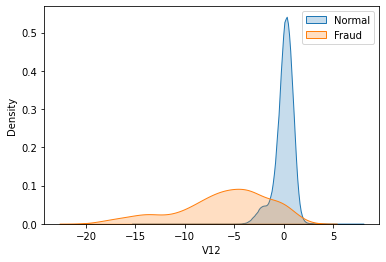

In [23]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data[data['class'] == 0]['V12'], label="Normal", shade=True)
sns.kdeplot(data=data[data['class'] == 1]['V12'], label="Fraud", shade=True)
plt.legend()
plt.show()

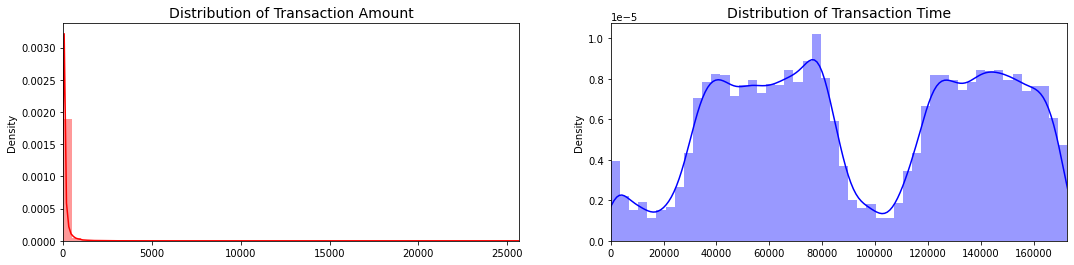

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

Val_Amount = data['Amount'].values
Val_Time = data['Time'].values

sns.distplot(Val_Amount, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(Val_Amount), max(Val_Amount)])

sns.distplot(Val_Time, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(Val_Time), max(Val_Time)])

plt.show()

In [26]:
fraud=data[data['class']==1]
genuine=data[data['class']==0]

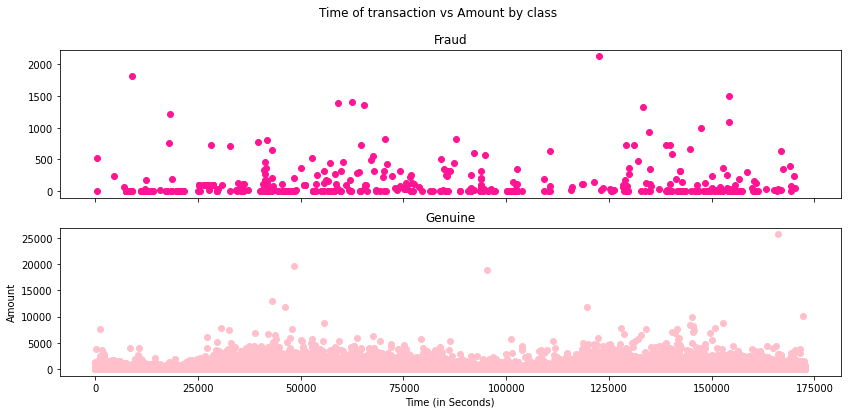

In [28]:
from pylab import rcParams

rcParams['figure.figsize'] = 14, 6
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount,color = 'deeppink')
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount,color = 'pink')
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Text(0.5, 1.0, 'Transaction Times for genuine users ')

<Figure size 576x288 with 0 Axes>

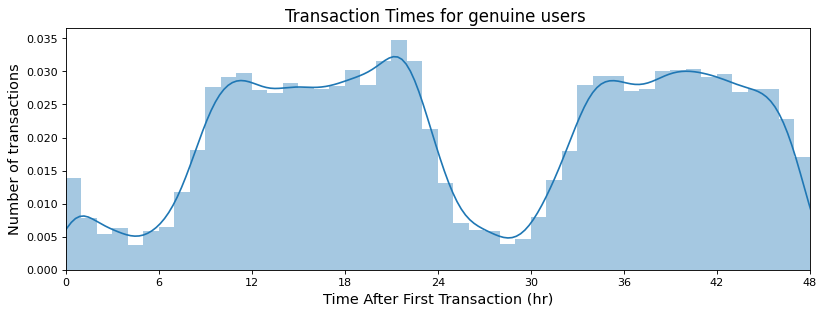

In [30]:
plt.figure(figsize=(8,4))
Nofraud_data = data [data['class']==0]
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(Nofraud_data ['Time']/60/60, bins=48)
plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel('Time After First Transaction (hr)',fontsize=13)
plt.ylabel('Number of transactions',fontsize=13)
plt.title('Transaction Times for genuine users ',fontsize=15)

Text(0.5, 1.0, 'Transaction Times for Non-genuine (fraudulent) users')

<Figure size 576x288 with 0 Axes>

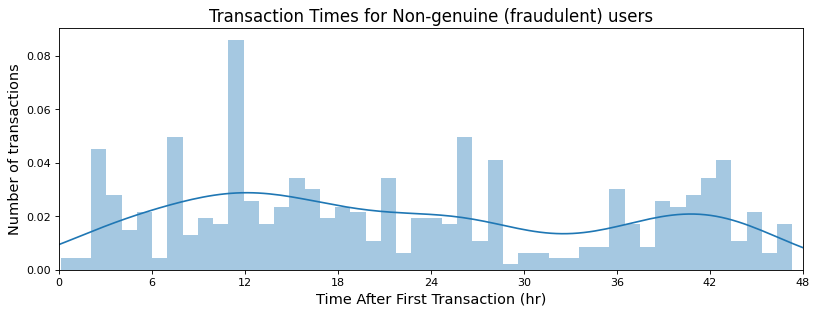

In [32]:
plt.figure(figsize=(8,4))
Fraud_data = data[data['class']==1]
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(Fraud_data['Time']/60/60, bins=48)
plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel('Time After First Transaction (hr)',fontsize=13)
plt.ylabel('Number of transactions',fontsize=13)
plt.title('Transaction Times for Non-genuine (fraudulent) users',fontsize=15)

<AxesSubplot:xlabel='Amount'>

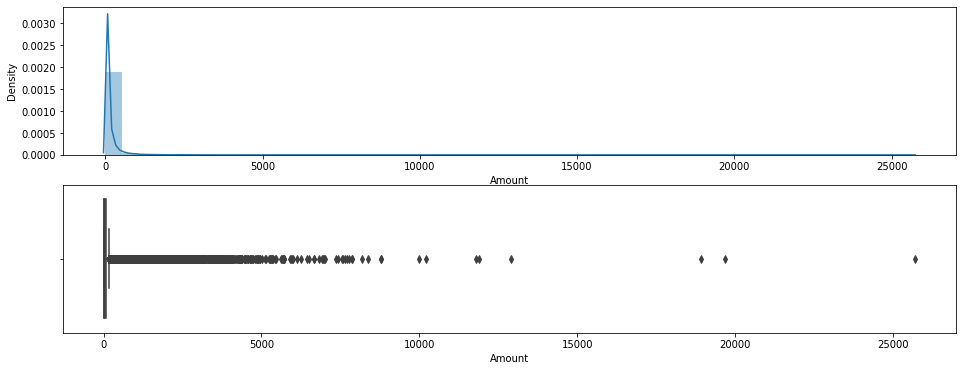

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,6))
sns.distplot(data.Amount, ax=ax1) 
sns.boxplot(data.Amount, ax=ax2)

In [34]:
from scipy.stats import iqr

upper_limit = data.Amount.quantile(0.75) + (1.5*iqr(data.Amount))
print(upper_limit)
print(data[data.Amount>upper_limit]['class'].value_counts())

185.375
0    31598
1       87
Name: class, dtype: int64


In [35]:
data = data[data.Amount<=8500]

print(data['class'].value_counts())
print('\nPercentage of fraudulent activity: {:.2%}'.format((data [data['class'] == 1].shape[0] / data.shape[0])))

0    283243
1       473
Name: class, dtype: int64

Percentage of fraudulent activity: 0.17%


In [36]:
from sklearn.preprocessing import StandardScalerstd_scaler = StandardScaler()
data['Scaled_Amount']=std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))

In [37]:
data.drop(['Amount','Time'],axis=1,inplace=True)
# drop the old feature in addition to the "time" feature 

In [38]:
X = data.drop('class', axis = 1)
y = data['class']

In [85]:
X.shape

(283716, 28)

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [41]:
fig = px.pie(values=y_resampled.value_counts(), width=800, height=400, title="Data Balance",color_discrete_sequence=["skyblue","black"])
fig.show()

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 0)

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
classifier=GaussianNB()
classifier.fit(X_train , y_train)

GaussianNB()

In [46]:
classifier.score(X_train , y_train)

0.910944243889953

In [47]:
classifier.score(X_test , y_test)

0.9101396317675511

In [48]:
naive_preds=classifier.predict(X_test)

In [49]:
confusion_matrix(y_test,naive_preds)

array([[55038,  1514],
       [ 8667, 48079]], dtype=int64)

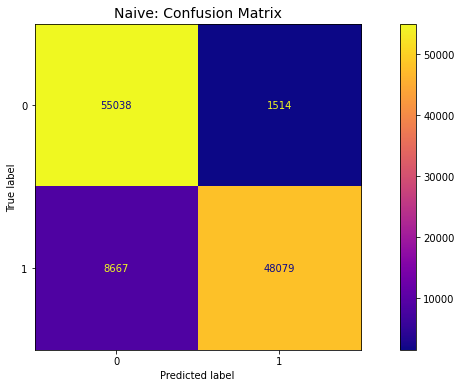

In [50]:
plot_confusion_matrix(classifier, X_test, y_test,cmap='plasma')
plt.title('Naive: Confusion Matrix', fontsize=14)
plt.show()

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt =DecisionTreeClassifier(max_features=8 , max_depth=6)
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=6, max_features=8)

In [53]:
dt.score(X_train , y_train)

0.951375588056171

In [54]:
dt.score(X_test , y_test)

0.9508199615174142

In [55]:
Name_features=X.columns
FeatureImportances=pd.DataFrame(dt.feature_importances_,index=Name_features).sort_values(by=0,axis = 0, ascending = False)

In [56]:
fig = px.bar(FeatureImportances.head()) 
fig.show()

In [57]:
DT_preds=dt.predict(X_test)

In [58]:
confusion_matrix(y_test,DT_preds)

array([[53906,  2646],
       [ 2926, 53820]], dtype=int64)

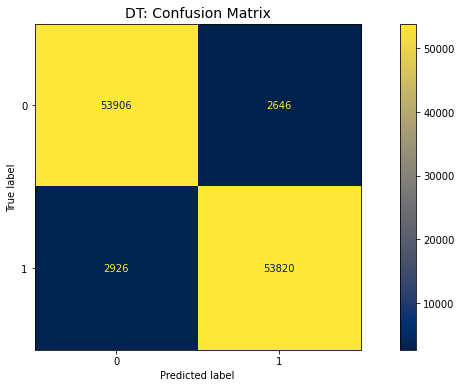

In [59]:
plot_confusion_matrix(dt, X_test, y_test,cmap='cividis')
plt.title('DT: Confusion Matrix', fontsize=14)
plt.show()

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, DT_preds))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     56552
           1       0.95      0.95      0.95     56746

    accuracy                           0.95    113298
   macro avg       0.95      0.95      0.95    113298
weighted avg       0.95      0.95      0.95    113298



In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr = LogisticRegression(C = 100)
lr.fit(X_train , y_train)

LogisticRegression(C=100)

In [63]:
lr.score(X_train , y_train)

0.9431670741502423

In [64]:
lr.score(X_test , y_test)

0.9422055111299406

In [65]:
LR_preds=lr.predict(X_test)

In [66]:
confusion_matrix(y_test,LR_preds)

array([[55090,  1462],
       [ 5086, 51660]], dtype=int64)

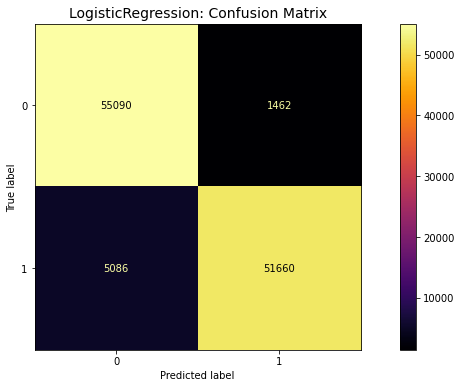

In [67]:
plot_confusion_matrix(lr, X_test, y_test,cmap='inferno')
plt.title('LogisticRegression: Confusion Matrix', fontsize=14)
plt.show()

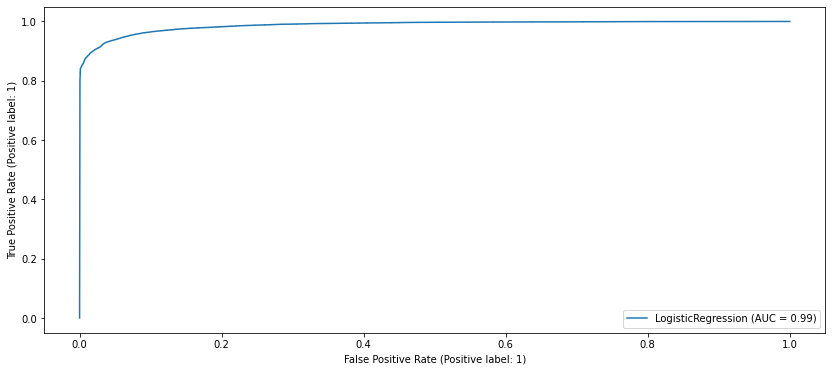

In [68]:
plot_roc_curve(lr, X_test, y_test)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LR_preds))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     56552
           1       0.97      0.91      0.94     56746

    accuracy                           0.94    113298
   macro avg       0.94      0.94      0.94    113298
weighted avg       0.94      0.94      0.94    113298



In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
Rclf = RandomForestClassifier(max_features=8 , max_depth=6)

In [72]:
Rclf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=8)

In [73]:
Rclf.score(X_train, y_train)

0.9590832060866572

In [74]:
Rclf.score(X_test, y_test)

0.9580751646101432

In [75]:
Rclf_preds=Rclf.predict(X_test)

In [76]:
confusion_matrix(y_test,Rclf_preds)

array([[56314,   238],
       [ 4512, 52234]], dtype=int64)

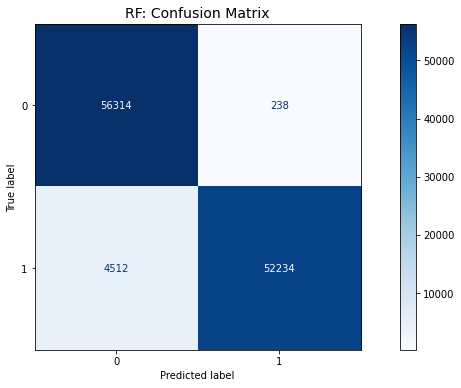

In [77]:
plot_confusion_matrix(Rclf, X_test, y_test,cmap='Blues')
plt.title('RF: Confusion Matrix', fontsize=14)
plt.show()

In [78]:
model_comparison={}
model_comparison['Decision Tree']=[accuracy_score(y_test,DT_preds),f1_score(y_test,DT_preds,average='weighted'),precision_score(y_test,DT_preds),recall_score(y_test,DT_preds)]
model_comparison['Naive']=[accuracy_score(y_test,naive_preds),f1_score(y_test,naive_preds,average='weighted'),precision_score(y_test,naive_preds),recall_score(y_test,naive_preds)] 
model_comparison['Logisticregerssion']=[accuracy_score(y_test,LR_preds),f1_score(y_test,LR_preds,average='weighted'),precision_score(y_test,LR_preds),recall_score(y_test,LR_preds)] 

In [79]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','precision','recall']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,precision,recall
Decision Tree,95.08%,95.08%,95.31%,94.84%
Logisticregerssion,94.22%,94.21%,97.25%,91.04%
Naive,91.01%,90.98%,96.95%,84.73%


In [80]:
fig = px.bar(Model_com_df['Model Accuracy']) 
fig.show()

In [84]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'class'],
      dtype='object')

In [81]:
import pickle 
# Saving model to disk
pickle.dump(dt, open('model_credit_dt.pkl','wb'))

In [82]:
import streamlit as st
import pickle as pkl

In [83]:
model_credit = pkl.load(open('model_credit_dt.pkl','rb'))

In [86]:
def predict(V1, V2, V3, V4, V5, V6, V7, V8, V9, V10,
       V11, V12, V13, V14, V15, V16, V17, V18, V19, V20,
       V21, V22, V23, V24, V25, V26, V27, V28):
    prediction = model_credit.predict([[V1, V2, V3, V4, V5, V6, V7, V8, V9, V10,
       V11, V12, V13, V14, V15, V16, V17, V18, V19, V20,
       V21, V22, V23, V24, V25, V26, V27, V28]])
    print(prediction)
    return(prediction)

In [89]:
v1 = st.number_input('Enter the value:')
v2 = st.number_input('Enter the value:')
v3 = st.number_input('Enter the value:')
v4 = st.number_input('Enter the value:')
v5 = st.number_input('Enter the value:')
v6 = st.number_input('Enter the value:')
v7 = st.number_input('Enter the value:')
v8 = st.number_input('Enter the value:')
# ....
v28 = st.number_input('Enter the value:')

2022-11-13 20:10:57.097 
  command:

    streamlit run c:\pythonn\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
if st.button('Predict'):
    result = predict(V1, V2, V3, V4, V5, V6, V7, V8, V9, V10,
       V11, V12, V13, V14, V15, V16, V17, V18, V19, V20,
       V21, V22, V23, V24, V25, V26, V27, V28)

In [ ]:
streamlit run fraud.py